In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

<h1><center>Let's import and read the data

In [604]:
train = pd.read_excel("C:\\Users\\97156\\Desktop\\moaz\\WORK\\Participants_Data_Used_Cars\\Data_Train.xlsx")
test = pd.read_excel("C:\\Users\\97156\\Desktop\\moaz\\WORK\\Participants_Data_Used_Cars\\Data_Test.xlsx")

In [605]:
# take a look at the dataset
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [606]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


<h1><center> Exploratory analysis

<h3>Training set

In [482]:
train.shape

(6019, 13)

In [483]:
# Column names in the dataset

train.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [484]:
# data-type

train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [485]:
# Statistics

train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [486]:
train.describe(include=['object'])

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,6019,6019,6019,6019,6019,6017,5983,5983,824
unique,1876,11,5,2,4,442,146,372,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,95.13 Lakh
freq,49,790,3205,4299,4929,172,606,235,6


In [487]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [488]:
# Checking null values in all columns

train.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

<h3>Testing set

In [489]:
test.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price'],
      dtype='object')

In [490]:
test.describe()

,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1223.000000
mean,2013.400324,58507.288493,5.284546
std,3.179700,35598.702098,0.825622
min,1996.000000,1000.000000,2.000000
25%,2011.000000,34000.000000,5.000000
50%,2014.000000,54572.500000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,350000.000000,10.000000


In [491]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
Name                 1234 non-null object
Location             1234 non-null object
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null object
Transmission         1234 non-null object
Owner_Type           1234 non-null object
Mileage              1234 non-null object
Engine               1224 non-null object
Power                1224 non-null object
Seats                1223 non-null float64
New_Price            182 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 115.8+ KB


In [492]:
test.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

<h1><center> Pre-Processing

<h3>Training set

In [607]:
train['Engine'] = train['Engine'].apply(lambda x : str(x).split(" ")[0]).astype(float)
train['Mileage'] = train['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype(float)
train['Power'] = train['Power'].replace('null bhp','0 bhp').apply(lambda x : str(x).split(' ')[0]).astype(float)
train['Manufacturer'] = train['Name'].apply(lambda x: ' '.join(x.split(' ')[:1])).astype(str)
train['Brand'] = train['Name'].apply(lambda x: ' '.join(x.split(' ')[1:2])).astype(str)

train['New_Price'].replace(np.nan, '0 Lakh', inplace=True)
train['New_Price'] = train['New_Price'].apply(lambda x : str(x).split(" ")[0]).astype(float)

In [608]:
# Calculate averages

avg_mileage = train['Mileage'].astype('float').mean(axis=0)
avg_power = train['Power'].astype('float').mean(axis=0)
avg_engine = train['Engine'].astype('float').mean(axis=0)
avg_seat = train['Seats'].astype('float').mean(axis=0)

print("Average of Mileage:", avg_mileage)
print("Average of power:", avg_power)
print("Average of engine:", avg_engine)
print("Average seat:", avg_seat)

Average of Mileage: 18.134960943992073
Average of power: 111.22763162293077
Average of engine: 1621.276449941501
Average seat: 5.278735151413753


In [609]:
# replace missing values with averages

train["Mileage"].replace(np.nan, avg_mileage, inplace=True)
train["Power"].replace(np.nan, avg_power, inplace=True)
train["Engine"].replace(np.nan, avg_engine, inplace=True)
train['Seats'].replace(np.nan, avg_seat, inplace=True)

In [610]:
loct = train.groupby(["Location"])["Price"].mean()
tran = train.groupby("Transmission")["Price"].mean()
fu = train.groupby("Fuel_Type")["Price"].mean()
own = train.groupby("Owner_Type")["Price"].mean()
manu= train.groupby("Manufacturer")["Price"].mean()
bran = train.groupby("Brand")["Price"].mean()

In [611]:
train['Location'].replace(loct.index, [1,2,3,4,5,6,7,8,9,10,11], inplace=True)
train['Transmission'].replace(tran.index, [1,2], inplace=True)
train['Fuel_Type'].replace(fu.index, [1,2,3,4,5], inplace=True)
train['Owner_Type'].replace(own.index, [1,2,3,4], inplace=True)
train['Manufacturer'].replace(manu.index, manu.values, inplace=True)
train['Brand'].replace(bran.index, bran.values, inplace=True)

In [612]:
del train['Name']
train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Manufacturer,Brand
0,10,2010,72000,1,2,1,26.60,998.0,58.16,5.0,0.00,1.75,4.517267,2.815714
1,11,2015,41000,2,2,1,19.67,1582.0,126.20,5.0,0.00,12.50,5.343433,12.177634
2,3,2011,46000,5,2,1,18.20,1199.0,88.70,5.0,8.61,4.50,5.411743,6.039828
3,3,2012,87000,2,2,1,20.77,1248.0,88.76,7.0,0.00,6.00,4.517267,6.964800
4,4,2013,40670,2,1,3,15.20,1968.0,140.80,5.0,0.00,17.74,25.537712,18.397051


In [613]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
Location             6019 non-null int64
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null int64
Transmission         6019 non-null int64
Owner_Type           6019 non-null int64
Mileage              6019 non-null float64
Engine               6019 non-null float64
Power                6019 non-null float64
Seats                6019 non-null float64
New_Price            6019 non-null float64
Price                6019 non-null float64
Manufacturer         6019 non-null float64
Brand                6019 non-null float64
dtypes: float64(8), int64(6)
memory usage: 658.5 KB


In [614]:
train.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Manufacturer         0
Brand                0
dtype: int64

In [615]:
train.corr()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Manufacturer,Brand
Location,1.000000,-0.020117,-0.042751,0.115048,0.040174,-0.033889,0.018773,-0.078302,-0.063908,-0.037234,-0.013565,-0.116620,-0.069337,-0.075883
Year,-0.020117,1.000000,-0.173048,-0.129526,-0.097059,-0.386160,0.321534,-0.051712,0.070520,0.012204,0.206800,0.305327,0.022695,0.114219
Kilometers_Driven,-0.042751,-0.173048,1.000000,-0.102953,0.025663,0.079924,-0.065253,0.091029,0.024197,0.083072,-0.053997,-0.011493,0.005658,0.014601
Fuel_Type,0.115048,-0.129526,-0.102953,1.000000,0.125219,0.043017,-0.152125,-0.401013,-0.262923,-0.297950,-0.096567,-0.305207,-0.292684,-0.323092
Transmission,0.040174,-0.097059,0.025663,0.125219,1.000000,0.003002,0.333096,-0.499082,-0.632029,0.075250,-0.225811,-0.586025,-0.653153,-0.616730
Owner_Type,-0.033889,-0.386160,0.079924,0.043017,0.003002,1.000000,-0.154188,0.048520,0.005638,0.003698,-0.076648,-0.094559,0.031936,-0.005401
Mileage,0.018773,0.321534,-0.065253,-0.152125,0.333096,-0.154188,1.000000,-0.588354,-0.444878,-0.303086,-0.003846,-0.306588,-0.384031,-0.399770
Engine,-0.078302,-0.051712,0.091029,-0.401013,-0.499082,0.048520,-0.588354,1.000000,0.840934,0.393087,0.151391,0.657118,0.651988,0.737502
Power,-0.063908,0.070520,0.024197,-0.262923,-0.632029,0.005638,-0.444878,0.840934,1.000000,0.108583,0.238570,0.757711,0.745618,0.819145
Seats,-0.037234,0.012204,0.083072,-0.297950,0.075250,0.003698,-0.303086,0.393087,0.108583,1.000000,0.004849,0.052118,-0.023769,0.063909


<h3>Testing Set

In [616]:
test['Engine'] = test['Engine'].apply(lambda x : str(x).split(" ")[0]).astype(float)
test['Mileage'] = test['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype(float)
test['Power'] = test['Power'].replace('null bhp','0 bhp').apply(lambda x : str(x).split(' ')[0]).astype(float)
test['Manufacturer'] = test['Name'].apply(lambda x: ' '.join(x.split(' ')[:1])).astype(str)
test['Brand'] = test['Name'].apply(lambda x: ' '.join(x.split(' ')[1:2])).astype(str)

test['New_Price'].replace(np.nan, '0 Lakh', inplace=True)
test['New_Price'] = test['New_Price'].apply(lambda x : str(x).split(" ")[0]).astype(float)

In [617]:
avg_power2 = test['Power'].astype('float').mean(axis=0)
avg_engine2 = test['Engine'].astype('float').mean(axis=0)
avg_seat2 = test['Seats'].astype('float').mean(axis=0)


print("Average of power:", avg_power2)
print("Average of engine:", avg_engine2)
print("Average seat:", avg_seat2)

Average of power: 108.39645833333354
Average of engine: 1593.5849673202615
Average seat: 5.28454619787408


In [618]:
# replace missing values with averages

test["Power"].replace(np.nan, avg_power, inplace=True)
test["Engine"].replace(np.nan, avg_engine, inplace=True)
test['Seats'].replace(np.nan, avg_seat, inplace=True)

In [619]:
a = test['Manufacturer'].value_counts()
b = test['Brand'].value_counts()

In [564]:
test['Location'].replace(loct.index, [1,2,3,4,5,6,7,8,9,10,11], inplace=True)
test['Transmission'].replace(tran.index, [1,2], inplace=True)
test['Fuel_Type'].replace(fu.index, [1,2,3,4,5], inplace=True)
test['Owner_Type'].replace(own.index, [1,2,3,4], inplace=True)
test['Manufacturer'].replace(a.index, a.values, inplace=True)
test['Brand'].replace(b.index, b.values, inplace=True)

In [565]:
del test['Name']
test.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Manufacturer,Brand
0,5,2014,40929,1,2,1,32.26,998.0,58.20,4.0,0.00,233,40
1,4,2013,54493,5,2,3,24.70,796.0,47.30,5.0,0.00,233,40
2,10,2017,34000,2,2,1,13.68,2393.0,147.80,7.0,25.27,96,39
3,6,2012,139000,2,2,1,23.59,1364.0,0.00,5.0,0.00,96,19
4,10,2014,29000,5,2,1,18.50,1197.0,82.85,5.0,0.00,233,56


In [566]:
test.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Manufacturer         0
Brand                0
dtype: int64

In [567]:
test.dtypes

Location               int64
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int64
Transmission           int64
Owner_Type             int64
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price            float64
Manufacturer           int64
Brand                  int64
dtype: object

In [568]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
Location             1234 non-null int64
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null int64
Transmission         1234 non-null int64
Owner_Type           1234 non-null int64
Mileage              1234 non-null float64
Engine               1234 non-null float64
Power                1234 non-null float64
Seats                1234 non-null float64
New_Price            1234 non-null float64
Manufacturer         1234 non-null int64
Brand                1234 non-null int64
dtypes: float64(5), int64(8)
memory usage: 125.5 KB


<h1><center>Scatter plot

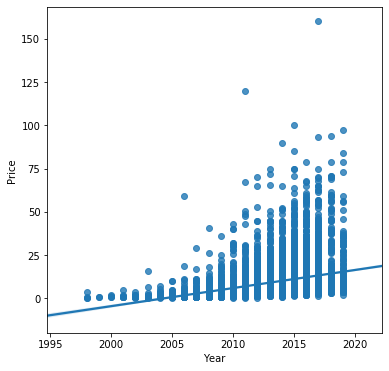

In [452]:
width = 6
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x= train.Year, y= train.Price, data=train)


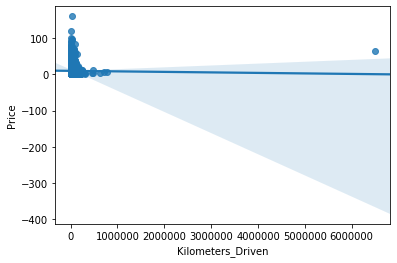

In [280]:
sns.regplot(x= train.Kilometers_Driven, y= train.Price, data=train)


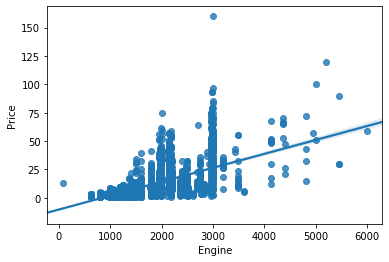

In [281]:
sns.regplot(x= train.Engine, y= train.Price, data=train)

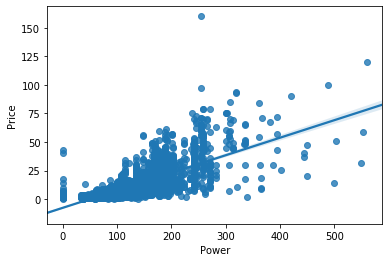

In [282]:
sns.regplot(x= train.Power, y= train.Price, data=train)

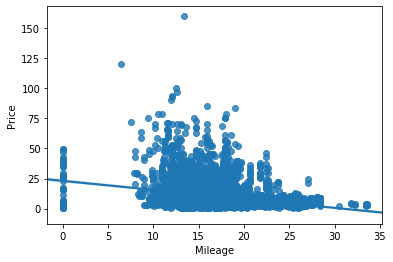

In [283]:
sns.regplot(x= train.Mileage, y= train.Price, data=train)

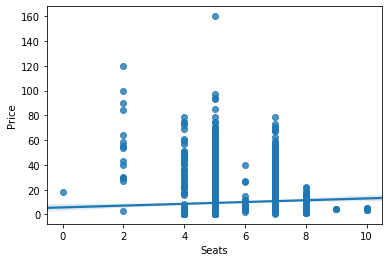

In [285]:
sns.regplot(x= train.Seats, y= train.Price, data=train)

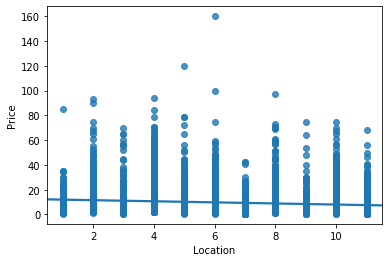

In [448]:
sns.regplot(x= train.Location, y= train.Price, data=train)

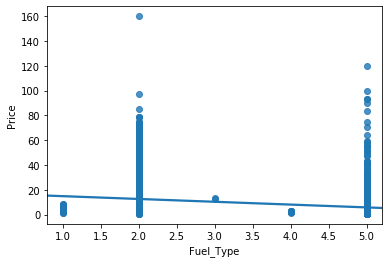

In [453]:
sns.regplot(x= train.Fuel_Type, y= train.Price, data=train)

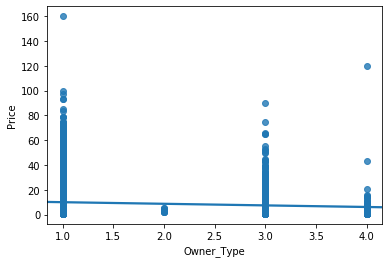

In [454]:
sns.regplot(x= train.Owner_Type, y= train.Price, data=train)

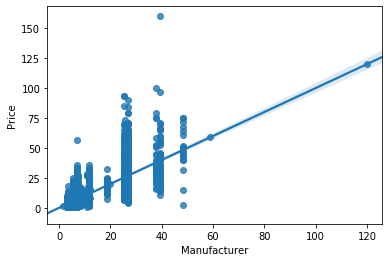

In [544]:
sns.regplot(x= train.Manufacturer, y= train.Price, data=train)

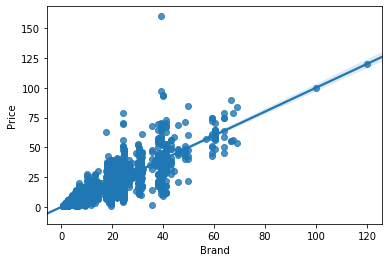

In [545]:
sns.regplot(x= train.Brand, y= train.Price, data=train)

<h1><center> Model and Predict

Using train_test_split we split "train" 

In [569]:
y = train["Price"]
X = train.drop(['Price'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [570]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4815, 13), (1204, 13), (4815,), (1204,))

Fit the training data

In [571]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [572]:
lm.intercept_

-1303.774704228563

In [573]:
lm.coef_

array([-1.81604128e-01,  6.49959462e-01, -1.36030722e-05, -1.41759032e-01,
       -4.07795156e-01, -1.45476647e-01, -7.39688251e-02,  7.54044025e-04,
        1.65140073e-02, -3.08908023e-01,  7.14426719e-02,  6.21929617e-02,
        7.46986469e-01])

<h4>Using Y = MX + C<br>

Price = intercept + M1X1 + M2X2 + M3X3 + .... + MnXn

In [575]:
Yhat = lm.predict(X_test)
print(len(Yhat))
Yhat

1204


array([36.91397817,  1.55937109, 10.35849903, ...,  7.8018021 ,
        5.37287929, 19.36059959])

<h2> Test set prediction

In [576]:
X2 = test

In [635]:
Yhat2 = lm.predict(X2)

Yhat2

array([45.13824983, 43.54536972, 41.6497015 , ..., 10.15663208,
       23.82128481, 22.90711519])

In [636]:
car_price = pd.DataFrame({'Price' : Yhat2})
car_price.head()

,Price
0,45.138250
1,43.545370
2,41.649702
3,17.621016
4,57.043276


<b>R^2 Scores

In [581]:
lm.score(X_test, y_test)

0.7581537450818763

In [464]:
lm.score(X_train,y_train)

0.8191461252030026

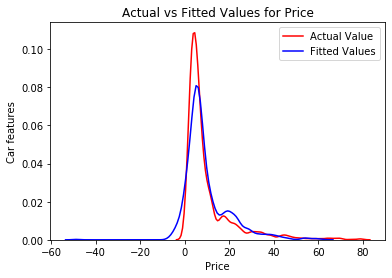

In [466]:
#plt.figure(figsize=(width, height))


#ax1 = sns.distplot(train['Price'], hist=False, color="r", label="Actual Value")
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Car features')

plt.show()
plt.close()